## Прогноз оттока клиентов в сети фитнес-центров «Культурист-датасаентист»

Я работаю аналитиком в сети фитнес-центров «Культурист-датасаентист», которая сейчас разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Необходимо понимать то, когда клиент больше не с нами. Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.

**Цель проекта:**
- научиться прогнозировать вероятность оттока на уровне следующего месяца для каждого клиента;
- сформировать типичные портреты клиентов, в том числе выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами (выделить целевые группы клиентов, предложить меры по снижению оттока и определить другие особенности взаимодействия с клиентами).

**Ход проекта:**

Все необходимые данные получим из файла `gym_churn.csv`. Нам понадобится для начала изучение общей информации, так как сейчас нет информации о качестве данных. Проверим данные на наличие всевозможных неточностей, которые могут помешать правильным результатам проекта. Затем проведем исследовательский анализ данных (EDA), построим модель прогнозирования оттока клиентов и сделаем кластеризацию клиентов. В итоге сформулируем вывод и подготовим базовые рекомендации по работе с клиентами.

Таким образом, вся работа пройдет в шесть шагов:

1. Загрузка, изучение и предобработка данных.
2. Исследовательский анализ данных (EDA).
3. Построение модели прогнозирования оттока клиентов.
4. Кластеризация клиентов. 
5. Общий вывод и рекомендации.

⚠️

Импортируем сразу же нужные библиотеки, затем в процессе будем добавлять при необходимости и другие:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

### 1. Загрузка данных и изучение общей информации

Начнем работу с загрузки данных из файла. Изучим общую информацию, а также проведем предобработку данных. Если найдем какие-то неточности - устраним их. 

---

Загружаем файл с данными отсюда `/datasets/gym_churn.csv`, сохраняем его в переменную `df`. Сразу выведем случайные десять строк таблицы, чтобы взглянуть на данные впервые и сразу в разных местах. Для этого вызовем функцию `sample()` с параметром `random_state`

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
display(df.sample(n = 10, random_state = 1))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
200,0,1,1,0,1,1,0,34,46.492200,1.0,0,1.010771,0.000000,1
1078,1,1,0,0,1,1,0,27,24.553945,1.0,4,1.390535,0.979445,1
610,1,1,1,1,1,6,1,31,85.671887,6.0,1,1.009510,0.730576,1
2159,1,0,1,0,1,1,0,26,75.803228,1.0,1,1.457390,1.540269,1
1169,0,0,0,0,1,1,0,31,410.756733,1.0,3,2.401838,2.473404,0
2448,0,0,0,0,1,12,1,28,106.110097,10.0,3,2.558573,2.520852,0
2938,1,1,0,0,0,1,0,23,199.155395,1.0,0,2.947225,2.701548,1
813,1,1,1,1,1,6,1,34,115.869242,4.0,9,0.652474,0.570673,0
1268,0,1,0,1,1,1,0,29,158.981864,1.0,2,1.775618,0.705410,1
870,0,1,0,0,1,1,1,32,67.587775,1.0,4,1.216622,1.333863,0


На первый взгляд не видно чего-то аномального или неправильного. Разве что в столбце `month_to_end_contract` все значения целочисенные, но тип данных судя по всему `float`, но займемся этим позднее.  Познакомимся с данными при помощи вызова `info()`, изучим их. В том числе посмотрим на типы данных и количество столбцов

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Файл `gym_churn.csv` содержит данные на месяц до оттока и факт оттока на определённый месяц (данные клиента за предыдущий до проверки факта оттока месяц и информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента). Всего в таблице 14 столбцов. Типы данных: `float` и `int`. Согласно документации к данным:
- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах);
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
- `Churn` — факт оттока в текущем месяце.

Пропущенных значений в данных нет. Приведем в порядок названия столбцов, сделав их по правилу «змеиного регистра»

In [4]:
df.columns = [x.lower() for x in df.columns.values]

В столбце `month_to_end_contract` все значения целочисенные, поэтому поменяем тип на `int`, так будет правильнее

In [5]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

Для спокойствия души и оптимизации датасета в целом - заменим тип данных в некоторых столбцах на `bool`, где это уместно, конечно

In [6]:
df[['gender','near_location', 'partner', 'promo_friends', 'phone',
    'group_visits', 'churn']] = df[['gender','near_location',
                                    'partner', 'promo_friends', 'phone', 'group_visits', 'churn']].astype('bool')

Проверим данные на наличие дубликатов

In [7]:
df.duplicated().sum()

0

Дубликатов нет, поэтому под конец шага просто убедимся, что названия столбцов в правильном виде, а также типы данных заменили верно

In [8]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   bool   
 1   near_location                      4000 non-null   bool   
 2   partner                            4000 non-null   bool   
 3   promo_friends                      4000 non-null   bool   
 4   phone                              4000 non-null   bool   
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   bool   
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [10]:
df['month_to_end_contract']

0        5
1       12
2        1
3       12
4        1
        ..
3995    12
3996     1
3997    11
3998     5
3999    12
Name: month_to_end_contract, Length: 4000, dtype: int64

**Вывод по шагу:**

Мы загрузили файл с данными, ознакомились с десятью случайными строками таблицы и в целом с общей информацией по ней. Файл содержит данные на месяц до оттока и факт оттока на определённый месяц (данные клиента за предыдущий до проверки факта оттока месяц и информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента). 

Данные оказались довольно таки качественными. В них нет пропусков и дубликатов, а также нет каких-то критичных неточностей. Мы лишь привели названия столбцов к общепринятому «змеиному регистру» и для себя, точнее для оптимизации, поменяли типы данных в некоторых столбцах.

### 2. Исследовательский анализ данных (EDA)

Приступим к исследовательскому анализу данных (EDA). На предыдущем шаге мы уже провели первоначальный осмотр данных и немного их подправили, теперь же займемся следующим:
- выясним средние значения и стандартные отклонения в датасете;
- посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
- построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- построим матрицу корреляций и отобразим её.

---

#### 2.1 Средние значения и стандартные отклонения

Выясним средние значения и стандартные отклонения в датасете. Для этого посмотрим на числовое описание данных при помощи метода `describe()` и сделаем соответствующие выводы

In [11]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00
lifetime,"4,000.00",3.72,3.75,0.00,1.00,3.00,5.00,31.00
avg_class_frequency_total,"4,000.00",1.88,0.97,0.00,1.18,1.83,2.54,6.02
avg_class_frequency_current_month,"4,000.00",1.77,1.05,0.00,0.96,1.72,2.51,6.15


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   bool   
 1   near_location                      4000 non-null   bool   
 2   partner                            4000 non-null   bool   
 3   promo_friends                      4000 non-null   bool   
 4   phone                              4000 non-null   bool   
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   bool   
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

И отдельно проверим столбцы с булевыми значениями

In [13]:
df['gender'].value_counts()

True     2041
False    1959
Name: gender, dtype: int64

In [14]:
df['near_location'].value_counts()

True     3381
False     619
Name: near_location, dtype: int64

In [15]:
df['partner'].value_counts()

False    2053
True     1947
Name: partner, dtype: int64

In [16]:
df['promo_friends'].value_counts()

False    2766
True     1234
Name: promo_friends, dtype: int64

In [17]:
df['phone'].value_counts()

True     3614
False     386
Name: phone, dtype: int64

In [18]:
df['group_visits'].value_counts()

False    2351
True     1649
Name: group_visits, dtype: int64

In [19]:
df['churn'].value_counts()

False    2939
True     1061
Name: churn, dtype: int64

**Вывод:**

По основным типам данных:
- длительность текущего действующего абонемента различная. Среднее значение почти 5 месяцев, а стандартное отклонение - 4.55;
- возраст колеблется от 18 лет и до 41 года. Среднее значение чуть больше 29 лет, а стандартное отклонение - 3.26;
- суммарная выручка от других услуг фитнес-центра в среднем составляет почти 147 у. е., а стандартное отклонение - 96.36 у. е.;
- срок до окончания текущего действующего абонемента в среднем составляет чуть больше 4-х месяцев, а стандартное отклонение - 	4.19. У большинства клиентов до окончания текущего действующего абонемента остался 1 месяц. 
- среднее время с момента первого обращения в фитнес-центр равно почти 4-м месяцам, а стандартное отклонение - 3.75;
- средняя частота посещений в неделю за все время с начала действия абонемента равна почти 2, а стандартное отклонение 0.97; 
- средняя частота посещений в неделю за предыдущий месяц равна также почти 2, а стандартное отклонение 1.05.

По булевым:
- женщин и мужчин примерно поровну;
- подавляющее большинство клиентов проживает или работает в районе, где находится фитнес-центр;
- клиентов от компании-партнёра примерно столько же, сколько и обычных;
- большинство клиентов пришли не по акции «приведи друга»;
- почти у всех клиентов указан контактный номер телефона;
- большинство клиентов хоть раз посещали групповые занятия, но их ненамного больше, чем тех, кто не посещал;
- отток клиентов есть и количество выглядит неприятным, но, к счастью, подавляющее большинство клиентов остается с нами. 

Каких-то серьезных отклонений нет, данные в порядке. 



#### 2.2 Cредние значения признаков в двух группах

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. Воспользуемся методом `groupby()`

In [20]:
pd.set_option('display.float_format', '{:,.3f}'.format)
df.groupby('churn').agg('mean').T

churn,False,True
gender,0.510,0.511
near_location,0.873,0.768
partner,0.534,0.355
promo_friends,0.354,0.184
phone,0.904,0.903
contract_period,5.747,1.729
group_visits,0.464,0.269
age,29.977,26.990
avg_additional_charges_total,158.446,115.083
month_to_end_contract,5.283,1.663


**Вывод:**
- в двух группах женщин и мужчин примерно поровну;
- немного больше клиентов проживающих или работающих в районе, где находится фитнес-центр, которые не попали в отток;
- половина клиентов не попавших в отток от компании-партнёра;
- чуть больше 18% клиентов попавших в отток, пришли по акции «приведи друга», оставшиеся чуть больше 35% - остались;
- в двух группах примерно поровну распределены клиенты, у которых указан телефон;
- в оттоке в основном клиенты, имеющие абонемент ближе к 1 месяцу, у оставшихся он, как правило, оформлен на полгода;
- групповые занятия чаще посещают клиенты, не попавшие в отток;
- средний возраст клиентов не попавших в отток - около 30 лет, попавших в отток - около 27 лет;
- средняя выручка от клиентов не попавших в отток - около 158 у. е., попавших в отток - около 115 у.е;
- в среднем абонемент истекает через 1.7 месяца у клиентов попавших в отток и 5.3 месяца у оставшихся;
- в среднем клиент не попавший в отток, проводит в фитнес-центре примерно 4.7 месяца с момента первого посещения, попавшие в отток - 1 месяц;
- средняя частота посещений в неделю клиента попавшего в отток за весь период около 1.47 посещений, у оставшихся 2 посещения;
- средняя частота посещений в неделю клиента попавшего в отток за предыдущий месяц около 1 посещения, у оставшихся 2 посещения.

#### 2.3 Построение столбчатых гистограмм и распределения признаков

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

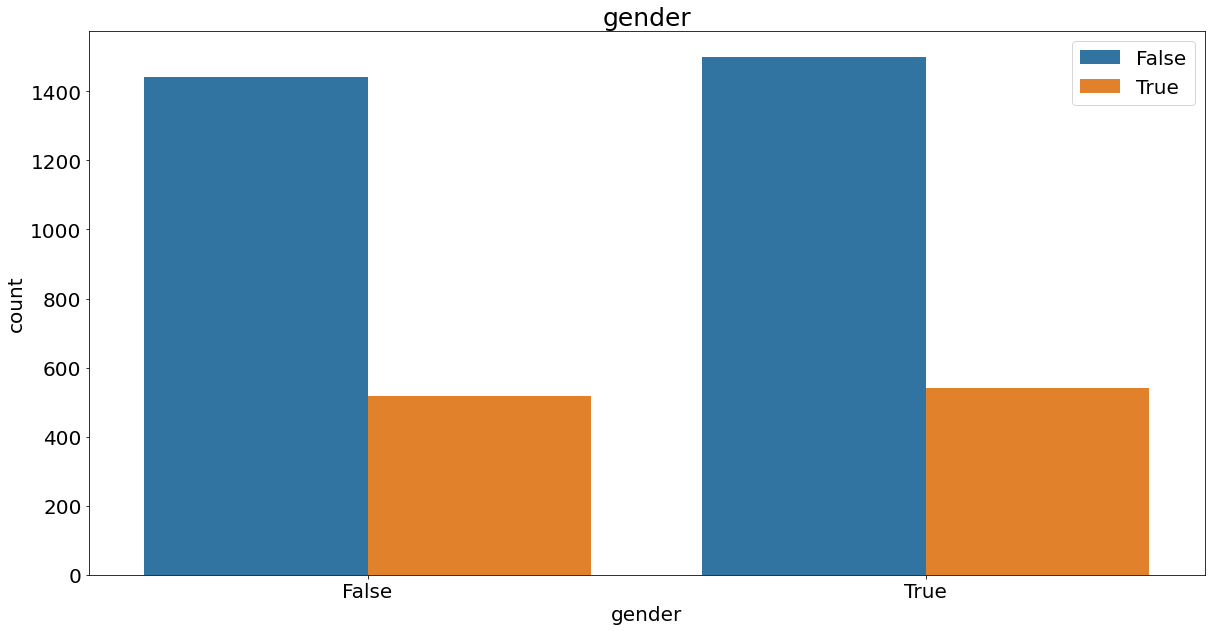

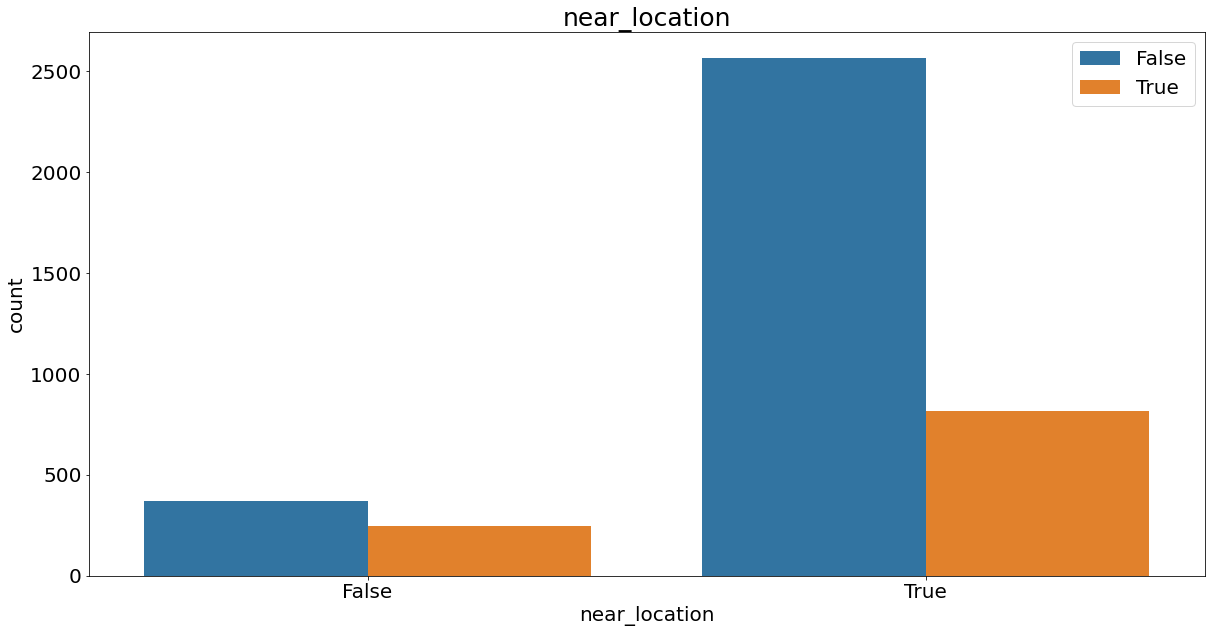

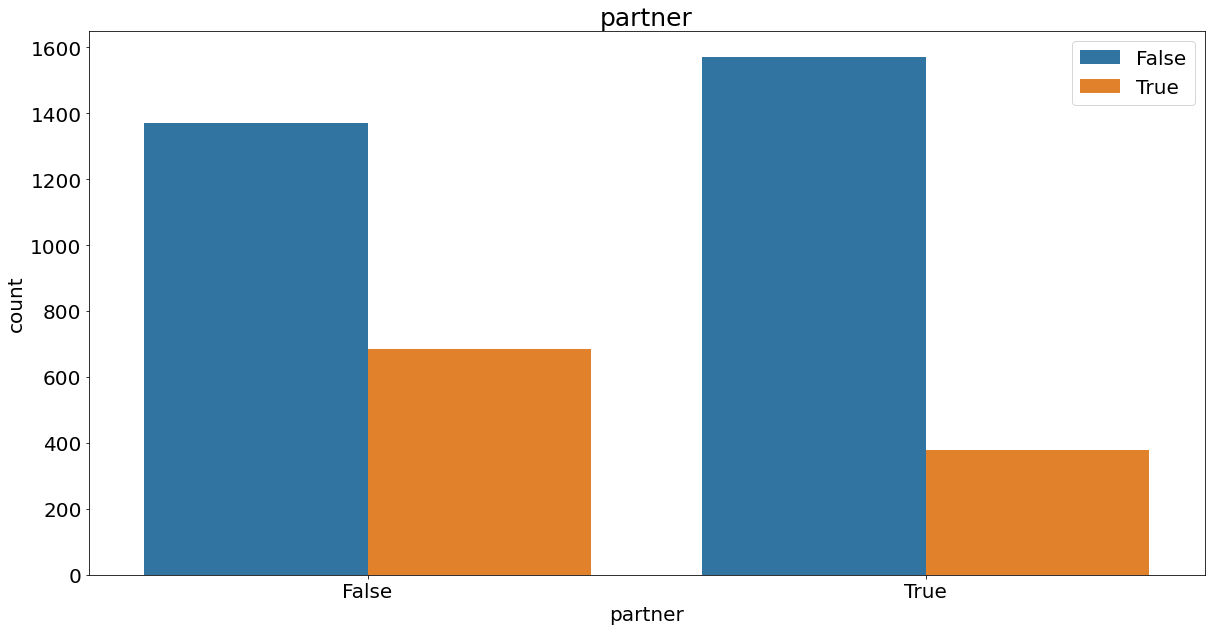

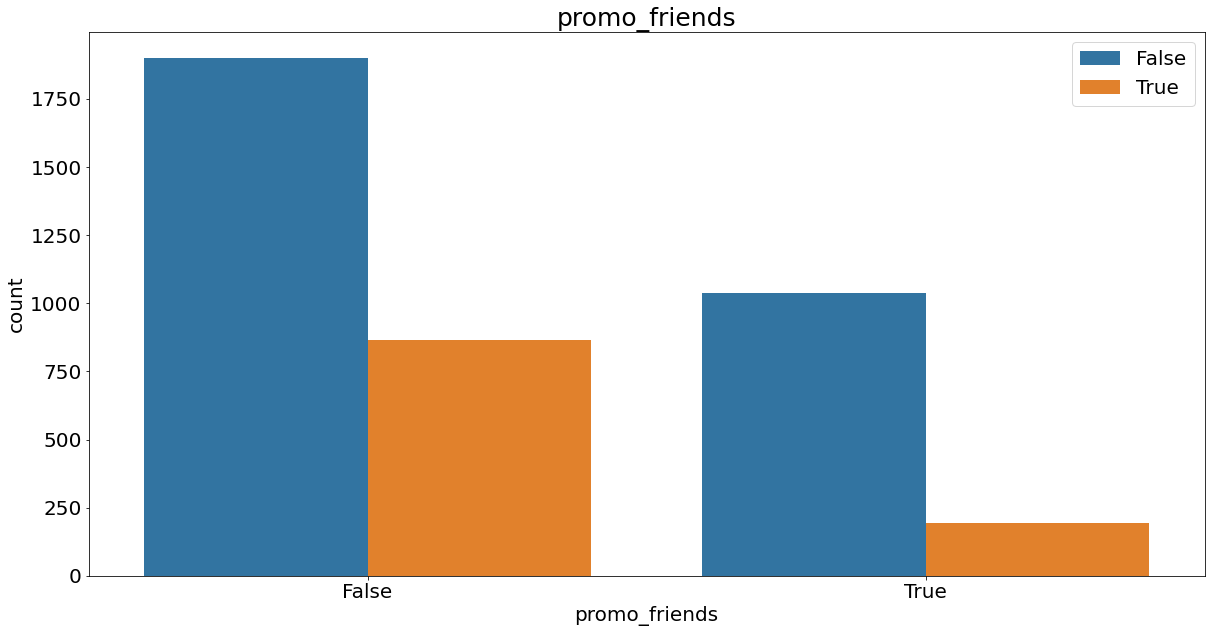

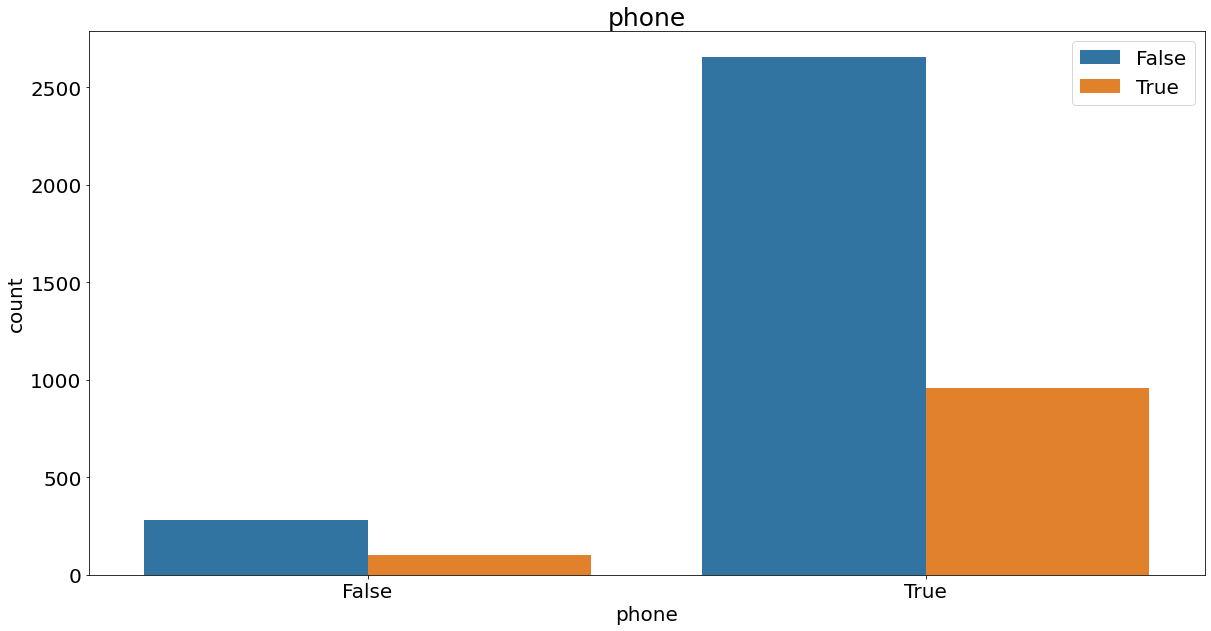

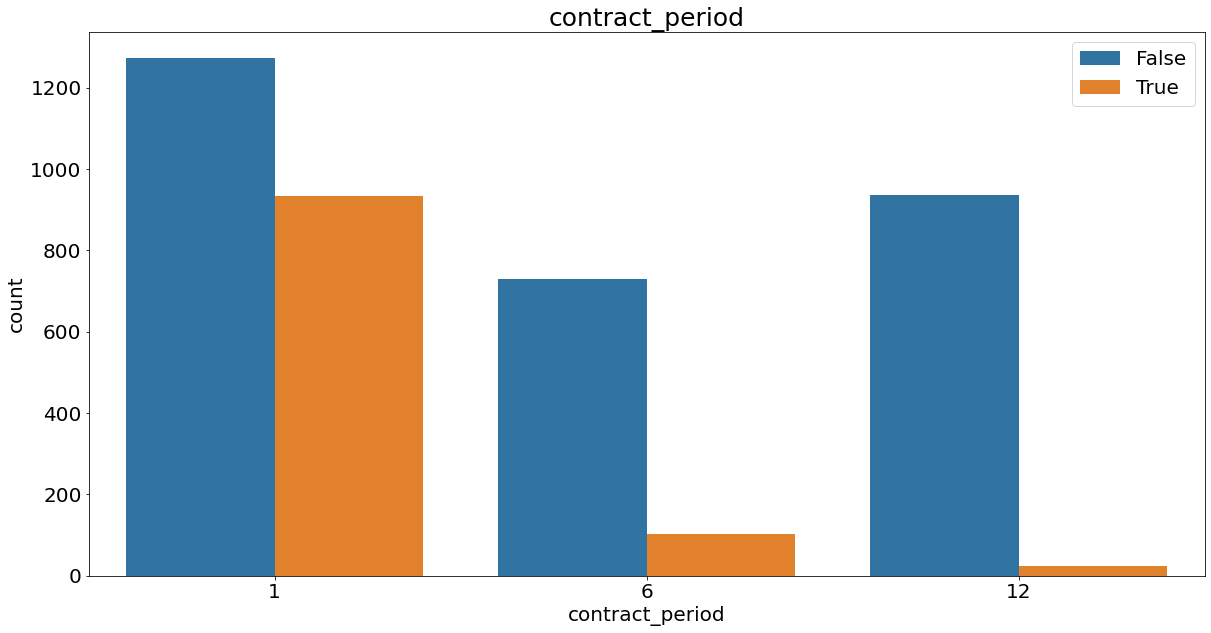

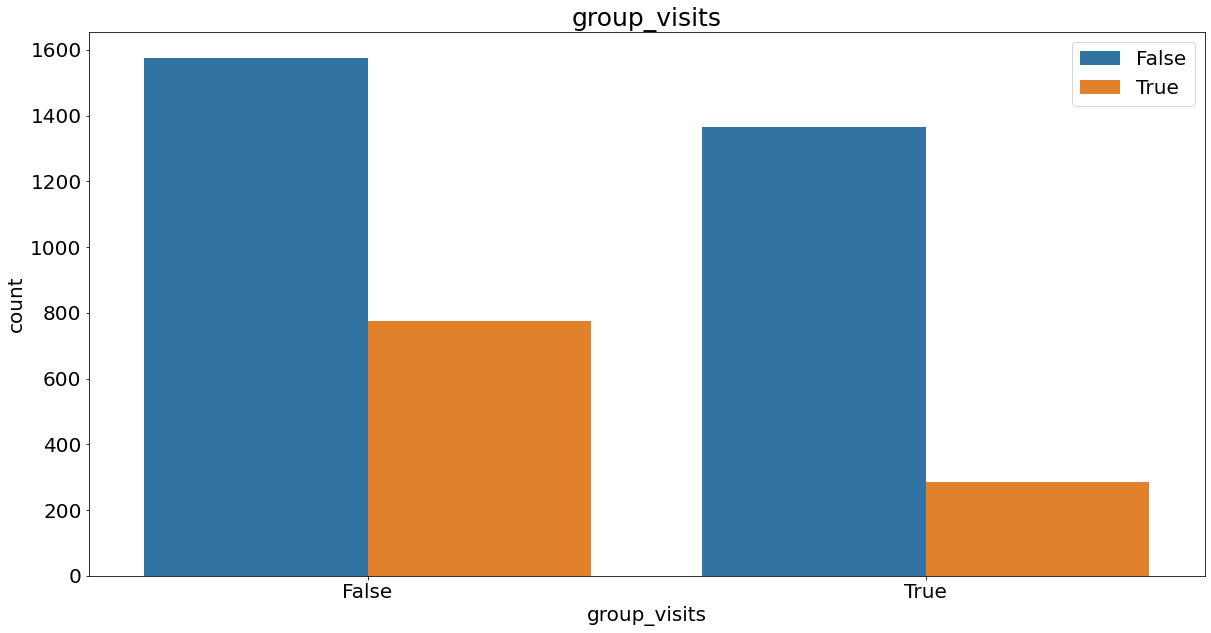

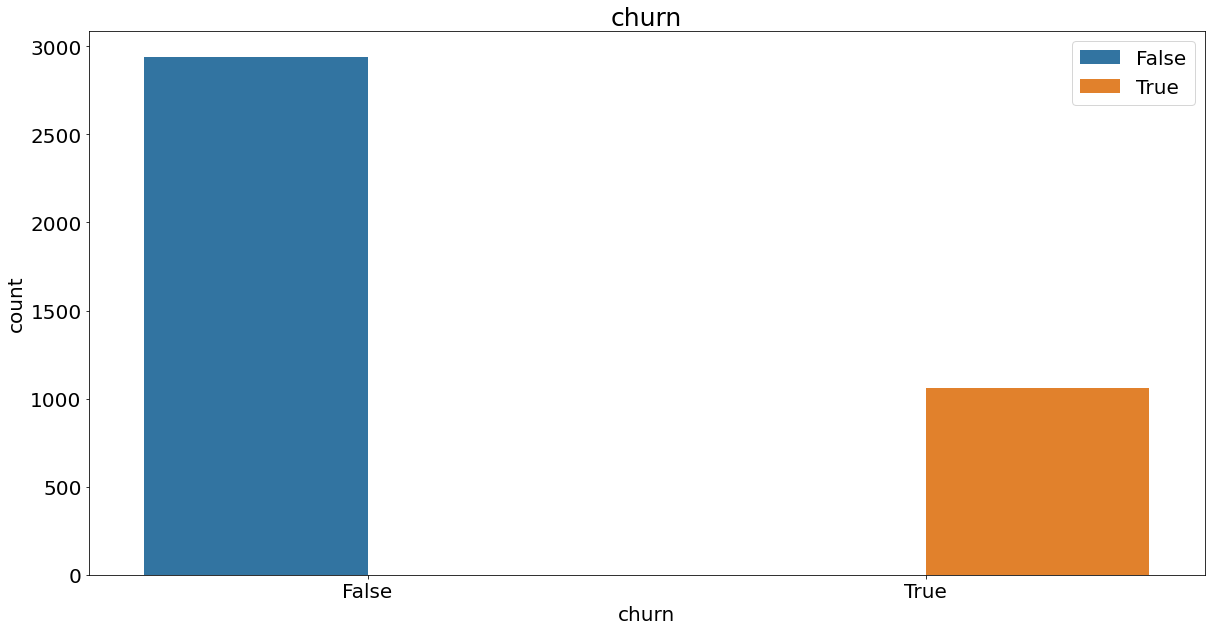

In [21]:
for column in df.columns:
    if len(df[column].unique()) <= 3:
        plt.figure(figsize = (20, 10))
        sns.countplot(x = column, data = df, hue = 'churn')
        plt.title(column, fontsize = 25)
        plt.legend(fontsize = 20)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('count', fontsize = 20)
        plt.show

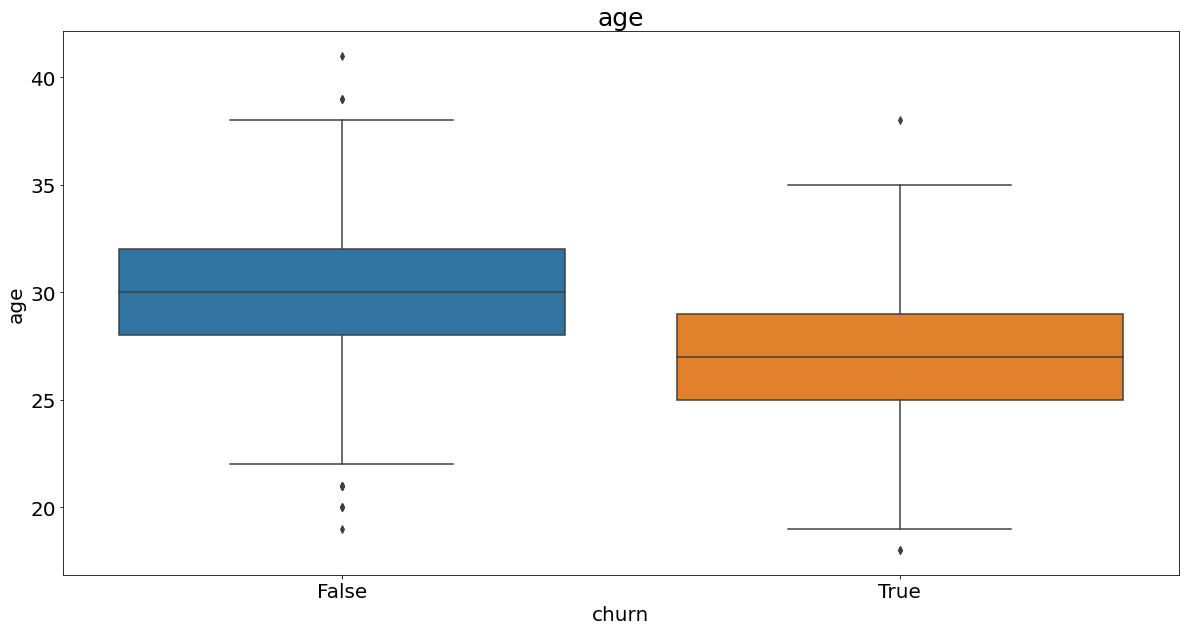

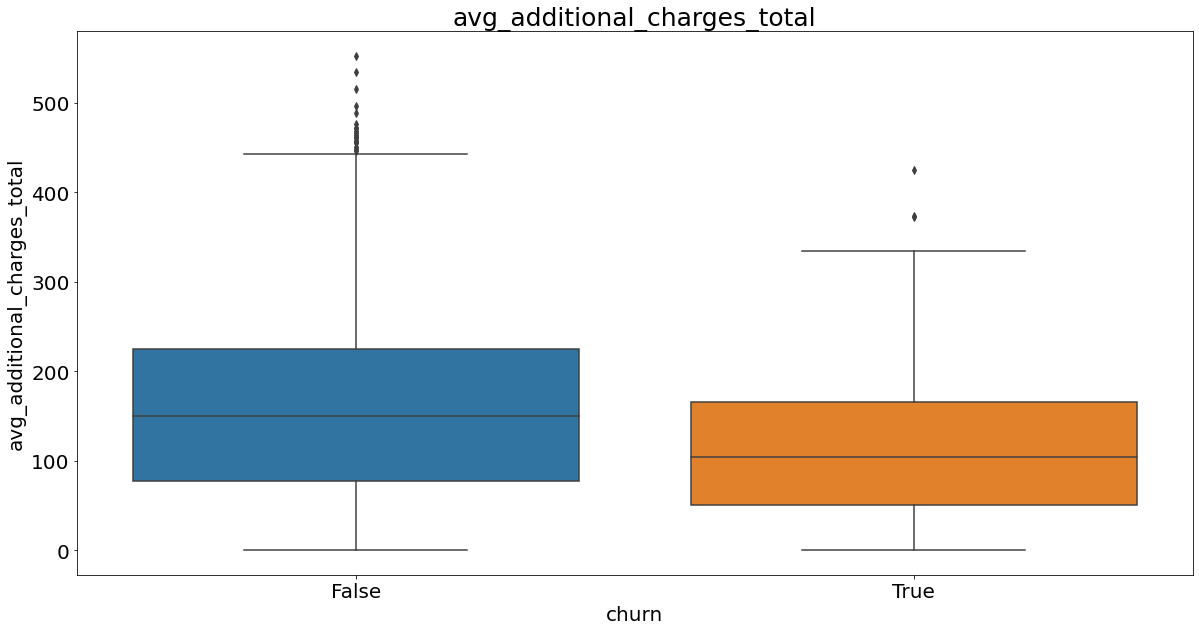

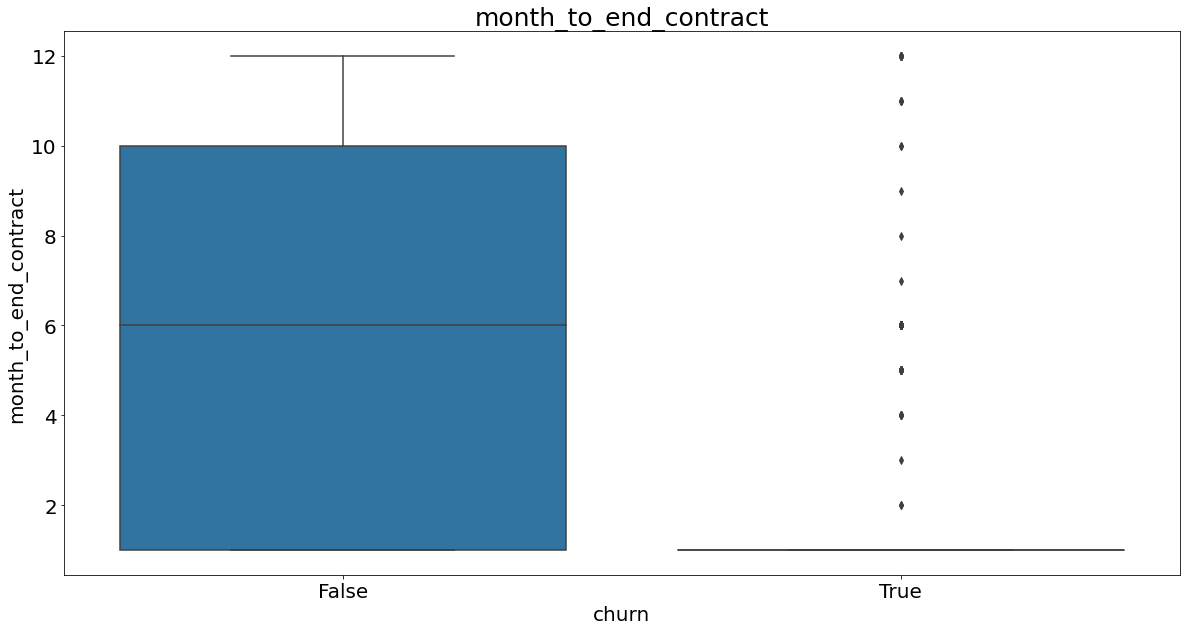

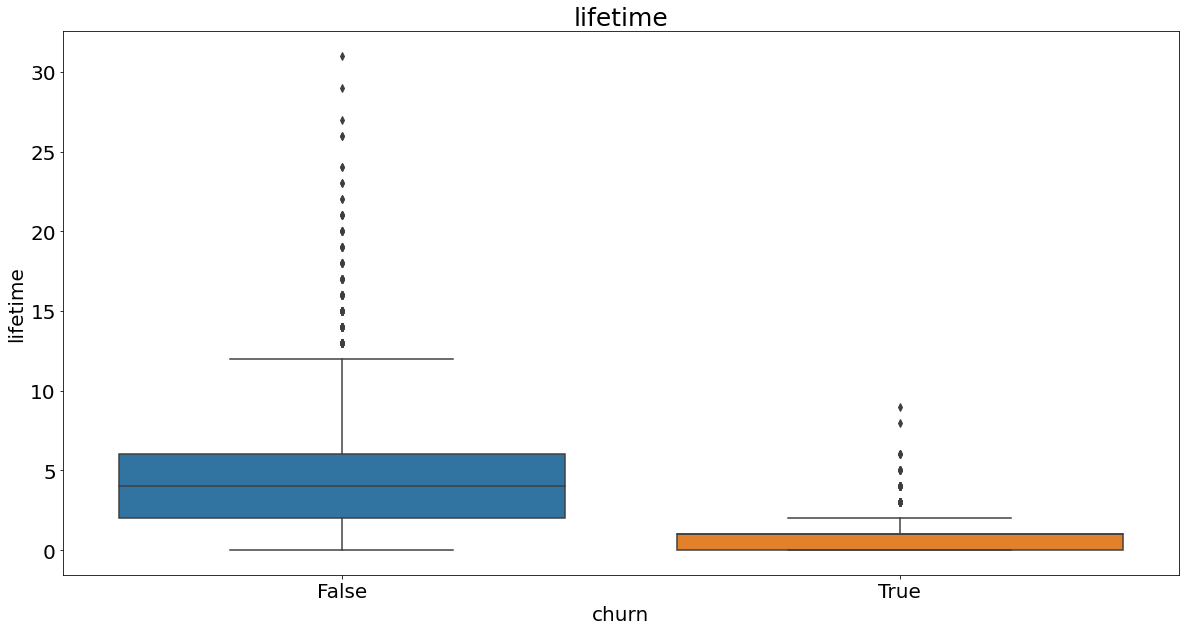

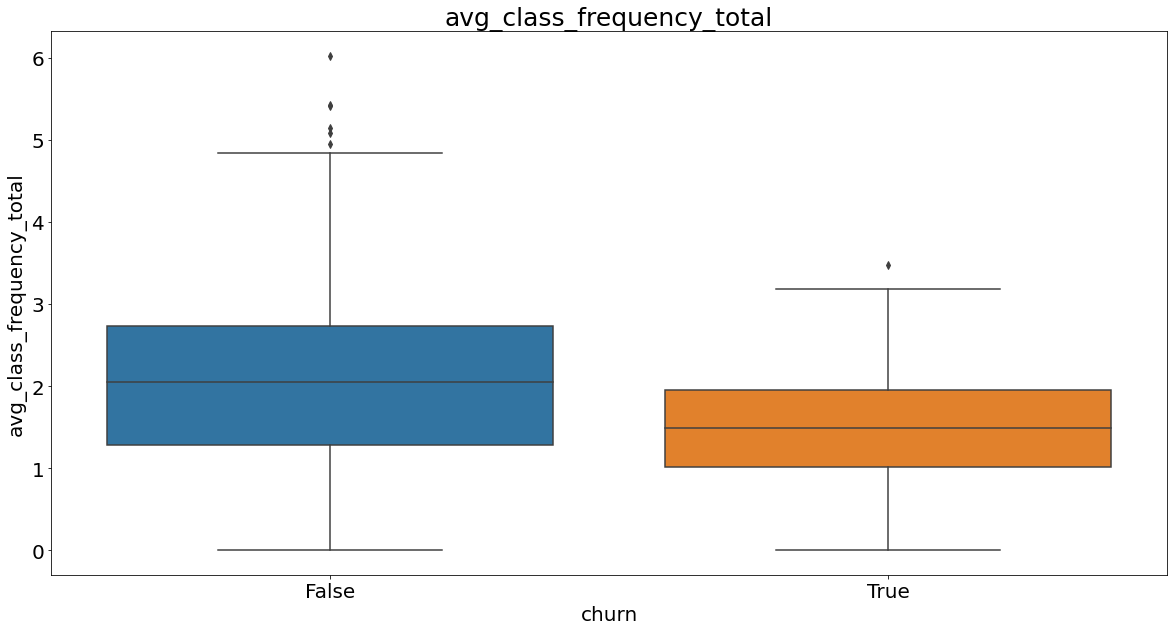

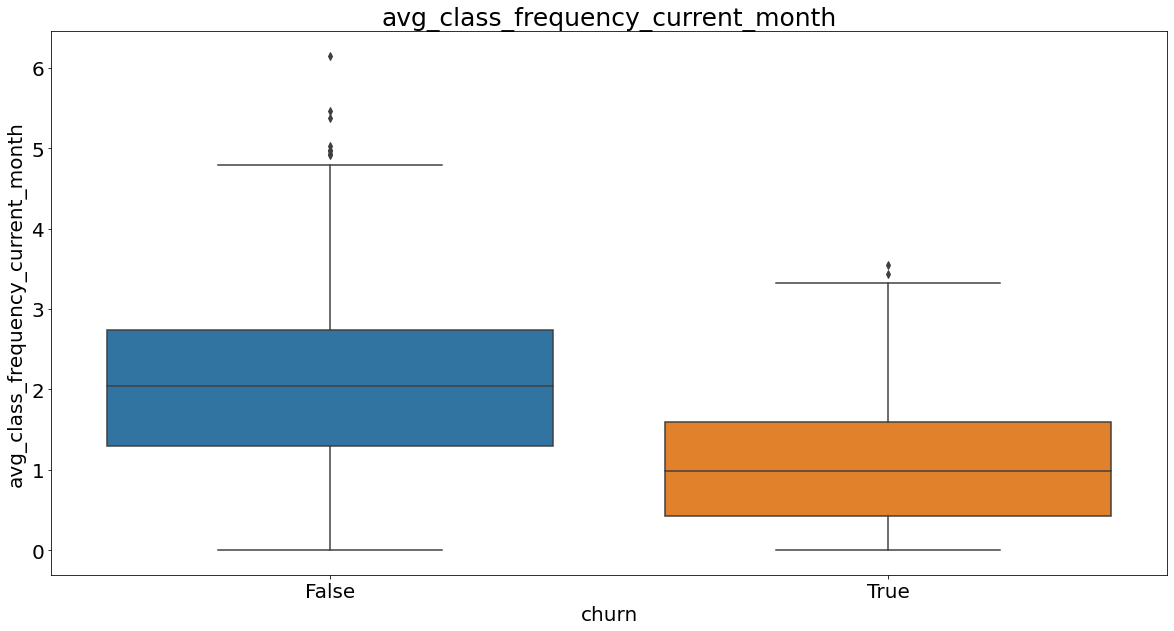

In [22]:
for column in df.columns:
    if len(df[column].unique()) > 3:
        plt.figure(figsize = (20, 10))
        sns.boxplot(x = 'churn', y = column, data = df)
        plt.title(column, fontsize = 25)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.xlabel('churn', fontsize = 20)
        plt.ylabel(column, fontsize = 20)
        plt.show

**Вывод:**

Можем сказать, что на данном этапе мы благодаря визуализации фактически более детально рассмотрели и увидели те выводы, которые сделали в предыдущем этапе. 

#### 2.4 Построение матрицы корреляций

Построим матрицу корреляций и отобразим её

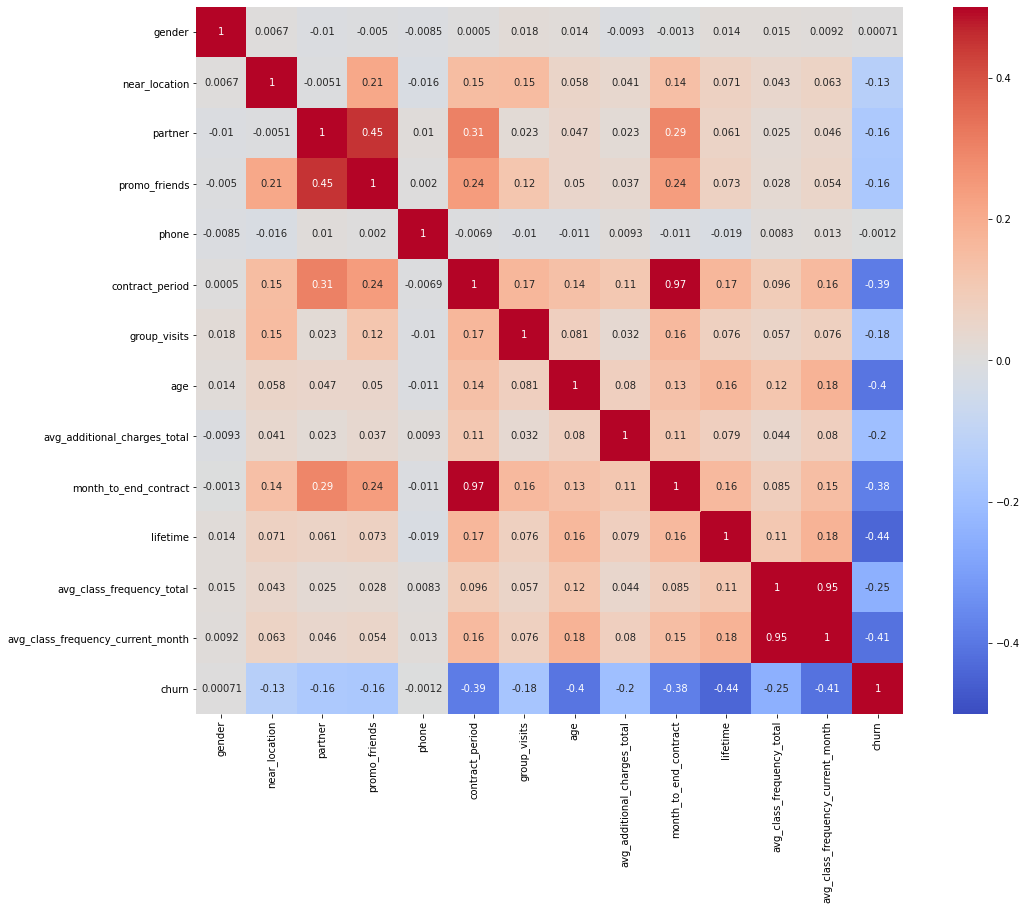

In [23]:
cm = df.corr()
plt.figure(figsize = (18, 13))
sns.heatmap(cm, annot = True, square = True, vmin = -0.5, vmax = 0.5, cmap = 'coolwarm')
plt.show()

**Вывод:**

Высокую корреляцию имеют:
- `month_to_end_contract` и `сontract_period`;
- `avg_class_frequency_total` и `avg_class_frequency_current_month`.

Наибольшая вероятность оттока наблюдается у клиентов, которые далеко живут или работают от фитнес-центра, не являются работниками партнёров, не участвуют в акции «приведи друга», не посещают групповые программы, имеют срок до окончания текущего действующего абонемента 1 месяц и у которых редкая посещаемость. 

**Вывод по шагу:**

Мы провели исследовательский анализ данных (EDA) и выяснили:
- средние значения и стандартные отклонения в датасете;
- посмотрели на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
- построили столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- построили матрицу корреляций и отобразили её.

Увидели, что каких-то серьезных отклонений нет, данные в порядке. Описали все свои наблюдения для понимания при просмотре работы. Визуализация позволила фактически более детально рассмотреть и увидеть те выводы, которые сделали до этого. Также узнали, какие показатели имеют высокую корреляцию, а также у клиентов с какими параметрами наиболее выражена вероятность оттока. 

### 3. Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
- разобьем данные на обучающую и валидационную выборку функцией `train_test_split()`;
- обучим модель на train-выборке двумя способами;
 - логистической регрессией,
 - случайным лесом.
- оценим метрики `accuracy`, `precision` и `recall` для обеих моделей на валидационной выборке, а также сравним по ним модели;
- выясним, какая модель показала себя лучше на основании метрик.

---

Разобьем данные на обучающую и валидационную выборку функцией `train_test_split()`

In [24]:
# функция вывода всех метрик
def print_all_metrics(y_true, y_pred, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    
# разделение данных на признаки и целевую переменную
X = df.drop('churn', axis = 1)
y = df['churn']

# разделение модели на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

Обучим модель на train-выборке логистической регрессией

In [25]:
# алгоритм для нашей модели
model = LogisticRegression(solver = 'liblinear')

# обучение модели
model.fit(X_train, y_train)

# бинарный прогноз
prediction = model.predict(X_test)

# вывод всех метрик для полученного прогноза
print_all_metrics(y_test, prediction, 'Логистическая регрессия')

Логистическая регрессия
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.84
	F1: 0.87


In [26]:
# создание датафрейма с именами признаков и их важностью, и его вывод по убыванию важности
feature_weights = [item for c in model.coef_ for item in c]

fi_model = pd.DataFrame(
    data={'feature': X.columns, 'importance': feature_weights}
)
fi_model.sort_values('importance', ascending = False)

,feature,importance
11,avg_class_frequency_total,3.228
4,phone,0.468
1,near_location,0.094
0,gender,0.050
2,partner,-0.003
8,avg_additional_charges_total,-0.005
9,month_to_end_contract,-0.079
5,contract_period,-0.195
7,age,-0.196
3,promo_friends,-0.320


Обучим модель на train-выборке случайным лесом

In [27]:
# алгоритм для нашей модели
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучение модели
rf_model.fit(X_train, y_train)

# бинарный прогноз
rf_predictions = rf_model.predict(X_test)

# вывод всех метрик для полученного прогноза
print_all_metrics(y_test, rf_predictions, 'Случайный лес')

Случайный лес
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85


In [28]:
# создание датафрейма с именами признаков и их важностью, и его вывод по убыванию важности
fi_df = pd.DataFrame(
    data={'feature': X.columns, 'importance': rf_model.feature_importances_}
)
fi_df.sort_values('importance', ascending = False)

,feature,importance
10,lifetime,0.270
12,avg_class_frequency_current_month,0.176
11,avg_class_frequency_total,0.136
7,age,0.121
8,avg_additional_charges_total,0.088
9,month_to_end_contract,0.073
5,contract_period,0.067
6,group_visits,0.016
0,gender,0.012
2,partner,0.012


В целом обе модели показали хорошие результаты, но наиболее подходящей моделью будет все-таки логистическая регрессия. У нее почти по всем параметрам лучшие показатели. 

**Вывод по шагу:**

Мы построили модель прогнозирования оттока клиентов, а именно:
- разбили данные на обучающую и валидационную выборку функцией `train_test_split()`;
- обучили модель на train-выборке двумя способами;
 - логистической регрессией,
 - случайным лесом.
- оценили метрики `accuracy`, `precision` и `recall` для обеих моделей на валидационной выборке, а также сравнили по ним модели;
- выяснили, что немного лучше себя показала логистическая регрессия.

### 4. Кластеризация клиентов

Займемся кластеризацией клиентов:
- стандартизируем данные;
- построим матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить;
- обучим модель кластеризации на основании алгоритма `K-Means` и спрогнозируем кластеры клиентов. За число кластеров примем, к примеру, n=5;
- построим распределения признаков для кластеров, посмотрим на средние значения признаков для кластеров и выявим заметные особенности;
- для каждого полученного кластера посчитаем долю оттока методом `groupby()` и выясним, отличаются ли они по доле оттока, а также какие кластеры склонны к оттоку, а какие — надёжны.

---

Стандартизируем данные и построим матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков, нарисуем дендрограмму

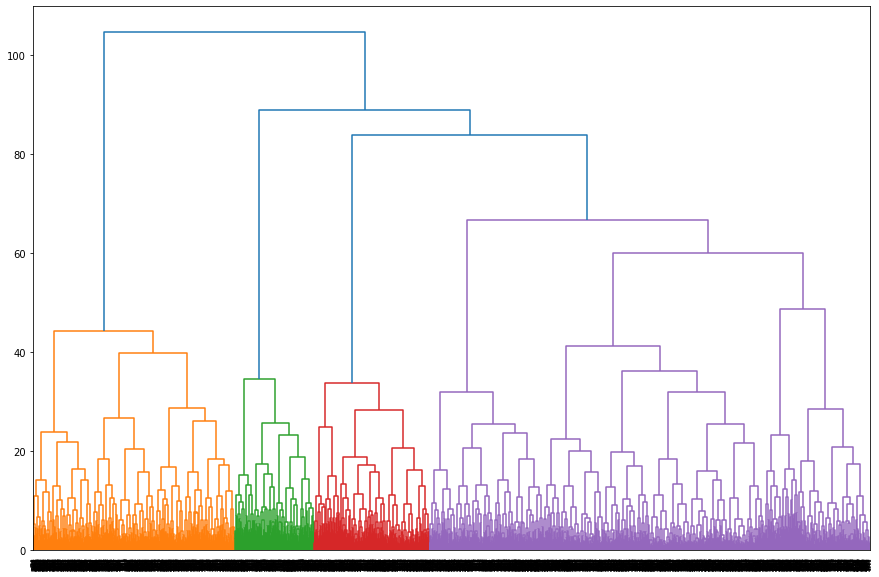

In [29]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

plt.figure(figsize = (15, 10))  
dendrogram(linked, orientation = 'top')
plt.show() 

График показывает, что явно выделены 4 кластера. 4-й кластер довольно таки объемный, поэтому разобьем его, чтобы использовать 5 кластеров. Теперь обучим модель кластеризации на основании алгоритма `K-Means` и спрогнозируем кластеры клиентов



In [30]:
km = KMeans(n_clusters = 5, random_state = 0)

labels = km.fit_predict(X_sc)

Сохраним метки кластера в наш датасет. Затем сразу построим распределения признаков для кластеров, посмотрим на средние значения признаков для кластеров и выявим заметные особенности

In [31]:
df['cluster'] = labels

df.groupby('cluster').agg('mean').T

cluster,0,1,2,3,4
gender,0.503,0.522,0.495,0.486,0.560
near_location,0.959,0.862,0.000,1.000,0.976
partner,0.783,0.470,0.463,0.350,0.357
promo_friends,0.574,0.306,0.079,0.240,0.230
phone,1.000,0.000,1.000,1.000,0.999
contract_period,10.889,4.787,2.352,1.948,2.669
group_visits,0.543,0.426,0.216,0.342,0.474
age,29.982,29.301,28.477,28.168,30.125
avg_additional_charges_total,160.761,143.958,135.458,131.622,161.658
month_to_end_contract,9.954,4.475,2.198,1.857,2.459


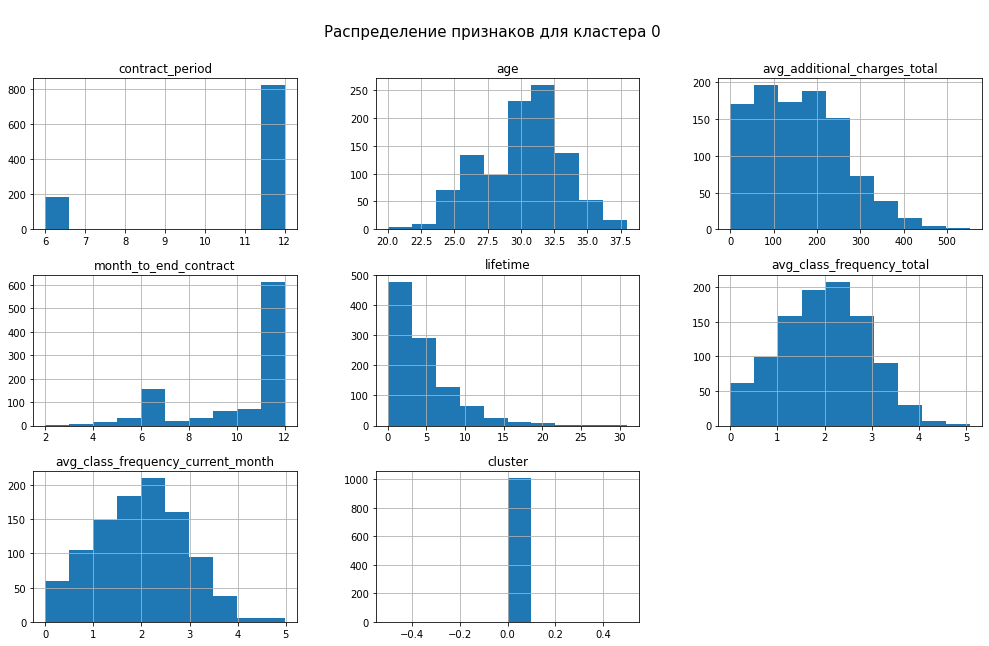

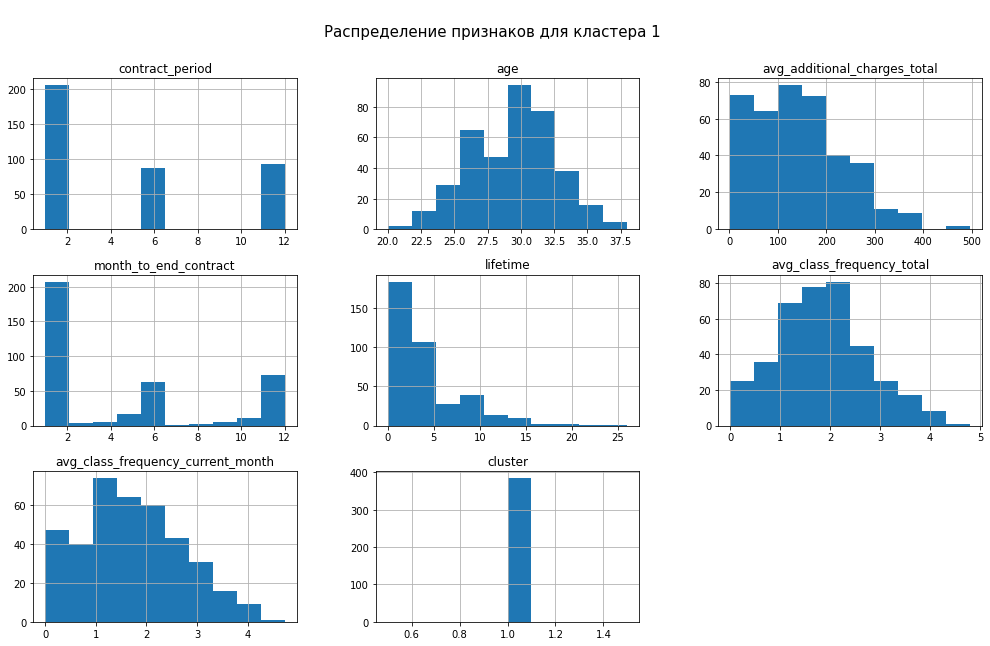

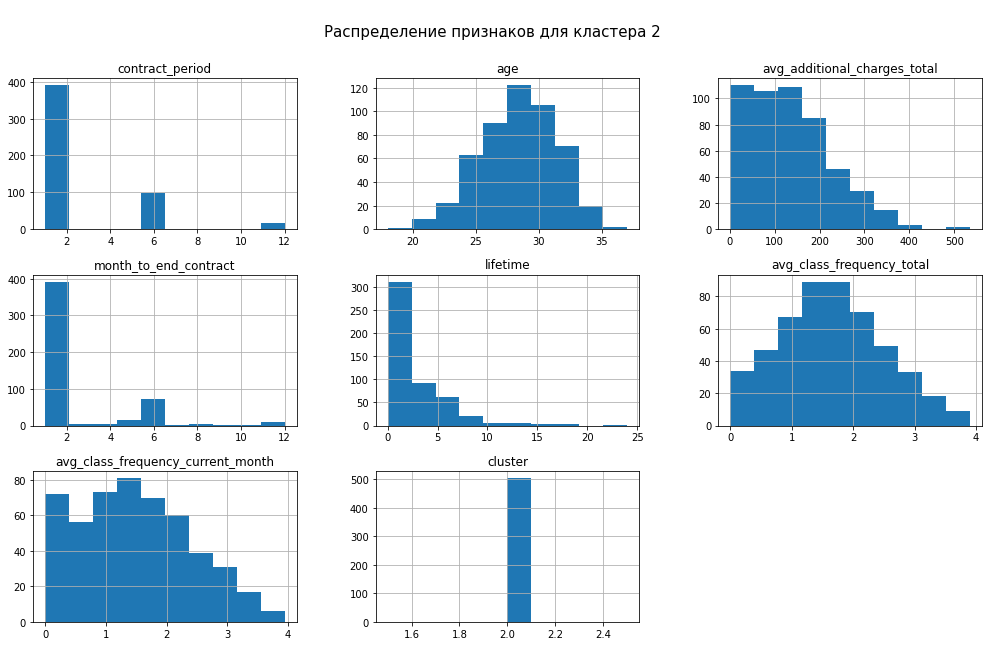

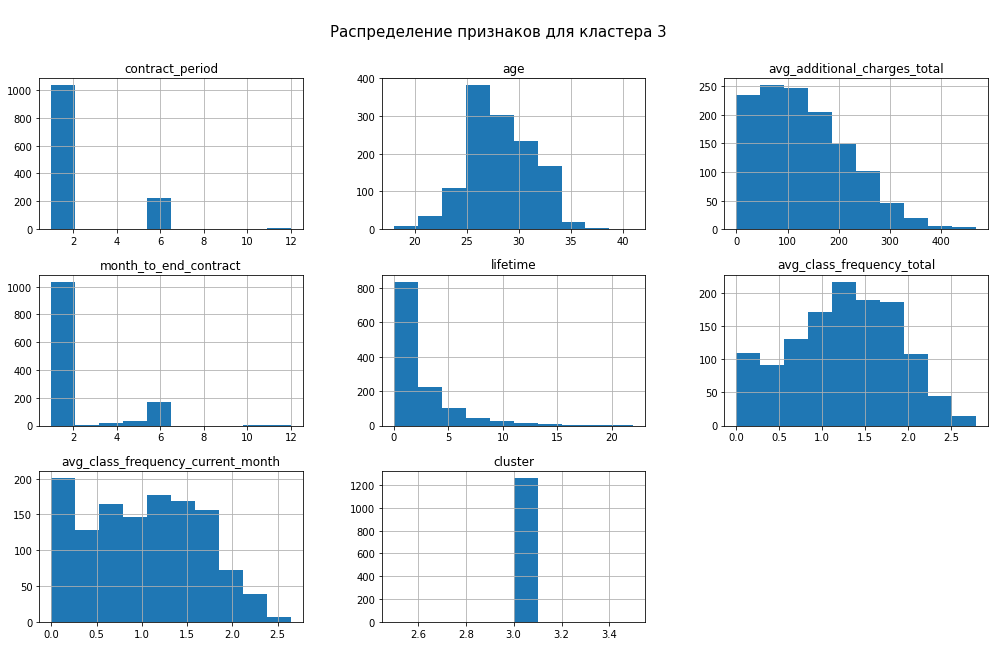

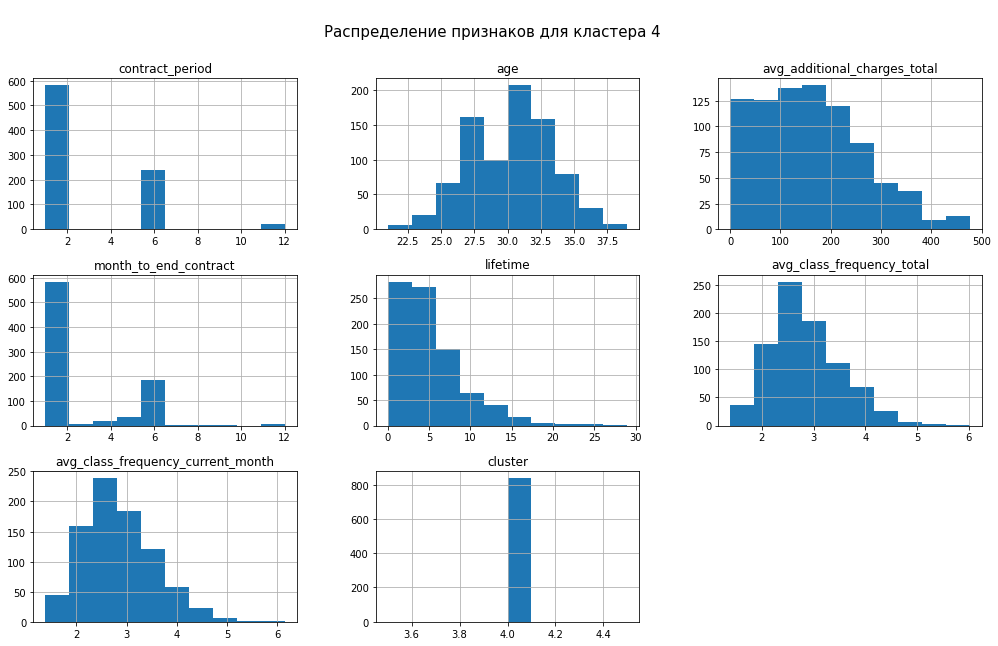

In [32]:
for value in [0, 1, 2, 3, 4]:
    df[df['cluster'] == value].hist(figsize = (17, 10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
    plt.show()

Касаемо наблюдаемых особенностей:
- в 0 кластере собраны в основном те клиенты, которые живут или работают близко к фитнес-клубу, а также пришедшие по акции «приведи друга». Большинство из них сотрудники партнеров. Ходят в фитнес-клуб в среднем почти 5 месяцев, а на дополнительные услуги тратят почти 161 у. е. До прекращения контракта у них остается почти 10 месяцев. Средняя частота посещений в неделю за все время с начала действия абонемента - почти 2 раза в неделю. Отток очень маленький;
- в 1 кластере собраны в основном те клиенты, которые также живут или работают близко к фитнес-клубу, при этом доля участвующих в акции «приведи друга» уже меньше половины. У них вообще не указаны номера телефонов. До прекращения контракта у них остается почти 5 месяцев;
- во 2 кластере собраны те клиенты, которые живут или работают далеко от фитнес-клуба, но у всех указаны номера телефонов. До конца контракта осталось чуть больше 2-х месяцев. На дополнительные услуги они тратят почти меньше всех - примерно 135 у. е. Их отток составляет почти 45%;
- в 3 кластере собраны те клиенты, которые живут или работают исключительно рядом с фитнес-клубом. У всех указаны номера телефонов. Средний возраст меньше всех - чуть больше 28 лет. Тратят на дополнительные услуги меньше всех - примерно 132 у. е. До конца контракта остается чуть меньше 2-х месяцев. Отток довольно таки большой - выше 50%;
- в 4 кластере собраны в основном те клиенту, которые живут или работют близко к фитнес-клубу. Почти у всех указан номер телефона. Групповые занятия посещают довольно таки часто. Возраст самый высокий - чуть больше 30 лет. Тратят на дополнительные услуги больше всех - почти 162 у. е. Отток очень маленький. 

Для каждого полученного кластера мы уже видим долю оттока, основываясь на информации выше. Там же видим, что кластеры отличаются по доле оттока, какие-то менее склонны к оттоку, а какие-то наоборот. На всякий случай отдельно посчитаем доли, дабы посмотреть на них без награмождений

In [33]:
churn_share = df.groupby('cluster')['churn'].agg('sum') / df.groupby('cluster')['churn'].size()
display(churn_share)

cluster
0   0.028
1   0.268
2   0.444
3   0.514
4   0.068
Name: churn, dtype: float64

2 и 3 кластеры наиболее склонны к оттоку, а 0 и 4 кластеры более надежды в этом плане. 

**Вывод по шагу:**

Мы выполнили кластеризацию клиентов, а именно:
- стандартизировали данные;
- построили матрицу расстояний на стандартизированной матрице признаков и нарисовали дендрограмму. Выделили 5 кластеров в качество оптимального количества;
- обучили модель кластеризации на основании алгоритма `K-Means` и спрогнозировали кластеры клиентов;
- построили распределения признаков для кластеров, изучили средние значения признаков для кластеров и детально описали выявленные заметные особенности по каждому кластеру;
- для каждого кластера посчитали долю оттока и выяснили, что различия здесь есть. 2 и 3 кластеры наиболее склонны к оттоку, а 0 и 4 кластеры более надежды в этом плане.

### 5. Общий вывод и рекомендации

Сформулируем основные выводы и предложим рекомендации для стратегии взаимодействия с клиентами и их удержания. Выделим несколько важных принципов и примеров их реализации в виде определённых маркетинговых действий. 

---

#### 5.1 Основные выводы 

Мы закончили работу, строго следуя изначально установленному ходу работы:
- загрузили необходимые данные, изучили их и лишь немного оптимизировали, так как в целом данные были качественными;
- провели исследовательский анализ данных (EDA), который позволил узнать, какие показатели имеют высокую корреляцию, а также у клиентов с какими параметрами наиболее выражена вероятность оттока;
- построили модель прогнозирования оттока клиентов, которая показала, что немного лучше себя проявляет логистическая регрессия; - произвели кластеризацию клиентов, которая позволила взглянуть на данные под новым углом. Установили 5 основных кластеров, обучили модель кластеризации на основании алгоритма `K-Means` и спрогнозировали кластеры клиентов. Отобразили выявленные особенности по каждому кластеру и посчитали долю оттока. 

Оказалось, что 2 и 3 кластеры наиболее склонны к оттоку, а 0 и 4 кластеры более надежды в этом плане.

Если углубиться в признаки, то следует, что наиболее склонны к оттоку клиенты, которые:
- не являются сотрудниками партнеров;
- реже пользуются акцией «приведи друга»;
- имеют наименьший средний срок контракта;
- редко ходят на групповые занятия;
- тратят меньше на дополнительные услуги;
- в целом реже посещают фитнес-клуб. 

Наиболее точно к этим признакам как раз подходят кластеры 2 и 3, остальные кластеры, соответственно, наоборот. То есть, на эти признаки стоит обращать внимание у клиентов, чтобы принимать своевременные и эффективные меры по предотвращению оттока. 

#### 5.2 Рекомендации

Необходимо ориентироваться на признаки 0 и 4 кластера, а также мотивировать клиентов в тех направлениях, которые влияют на их отток. 

Маркетинговому отделу, в синергии с другими нужными отделами, необходимо:
- реализовать лояльные и интересные предложения по продвижению дополнительных услуг и групповых занятий в целом;
- продумать интересные акции, либо дополнить абонементы ограниченным количеством дополнительных услуг за бесплатно, чтобы мотивировать клиента появляться чаще. Возможно, что даже на регулярной основе. К примеру, раз в месяц проводить какое-то занятие бесплатно;
- внедрить выгодные предложения для контрактов на срок от 6 месяцев и более;
- вести работу над расширением партнерской сети с другими компаниями, которым можно будет сделать выгодные предложения для их сотрудников;
- проработать новые интересные предложения в рамках акции «приведи друга».

Конечно, без базового клиентского обслуживания никуда. Помимо всего этого, в фитнес-клубе должна быть отличная атмосфера, все необходимое для комфортных занятий и своевременная помощь от персонала. Клиентам должно быть приятно и за радость посещать фитнес-клуб. 